In [1]:
import os
os.chdir("../")

In [2]:
import json
import pickle
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
from detectron2.engine import DefaultPredictor
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer

from src.utils.config import load_config
from src.utils.detectron_utils import plot_samples, get_train_cfg, on_image

c:\Users\marce\miniconda3\envs\tfg\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
global_config, local_config = load_config()

In [4]:
train_labels_file = "train.json"
train_2_labels_file = "train2.json"
test_labels_file = "test.json"
test_2_labels_file = "test2.json"

with open(
    Path(local_config["PATH"]["coco_labels"]).joinpath(train_labels_file)
) as file:
    coco_train_labels = json.load(file)

with open(
    Path(local_config["PATH"]["coco_labels"]).joinpath(test_labels_file)
) as file:
    coco_test_labels = json.load(file)

CONVERTING ALL LABELS TO SAME CLASS FOR INITIAL SIMPLICITY

In [5]:
for dataset in [coco_train_labels, coco_test_labels]:
    annotations = []
    for annotation in dataset["annotations"]:
        annotation["category_id"] = 1
        annotations.append(annotation)
    dataset["annotations"] = annotations
    dataset["categories"] = [dataset["categories"][0]]

In [6]:
with open(local_config["PATH"]["coco_labels"]+train_2_labels_file, mode="w", encoding="utf-8") as f:
    json.dump(coco_train_labels, f, ensure_ascii=False, indent=4)
with open(local_config["PATH"]["coco_labels"]+test_2_labels_file, mode="w", encoding="utf-8") as f:
    json.dump(coco_test_labels, f, ensure_ascii=False, indent=4)

DETECTRON2 CONFIGURATION

In [7]:
config_file_path = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
output_dir = local_config["PATH"]["models"]+"insance_segmentation\\"
num_classes = 1
device = "cuda"
train_dataset_name = "hold_detector_train"
train_images_path = local_config["PATH"]["coco_routes"]
train_annotations_path = local_config["PATH"]["coco_labels"]+train_2_labels_file
test_dataset_name = "hold_detector_test"
test_images_path = local_config["PATH"]["coco_routes"]
test_annotations_path = local_config["PATH"]["coco_labels"]+test_2_labels_file

In [8]:
register_coco_instances(
    name = train_dataset_name,
    metadata = {},
    json_file = train_annotations_path,
    image_root = train_images_path,
)
register_coco_instances(
    name = test_dataset_name,
    metadata = {},
    json_file = test_annotations_path,
    image_root = test_images_path,
)

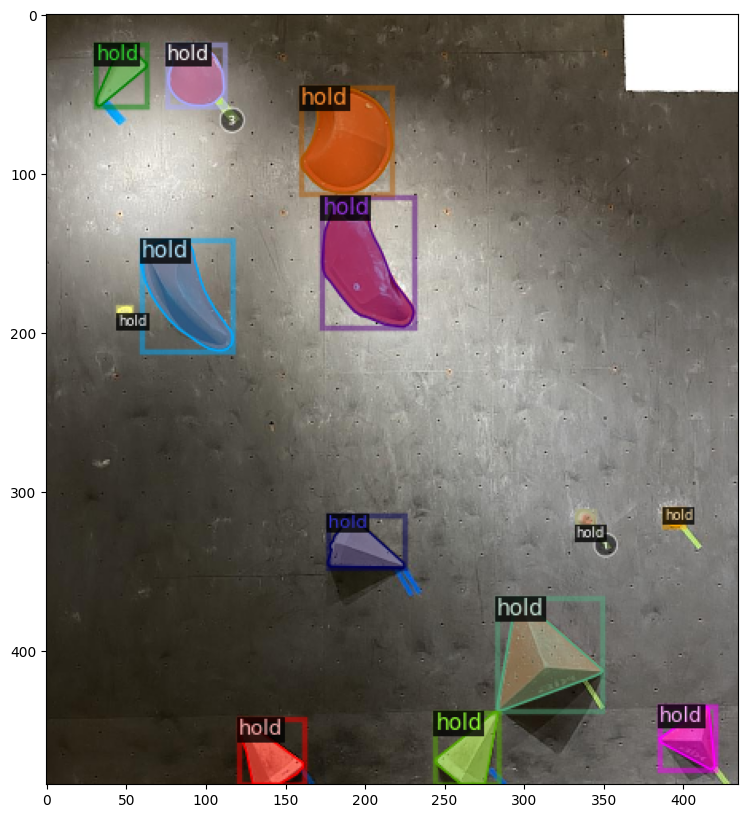

In [9]:
plot_samples(test_dataset_name, n_images=1, image_size=(10,10))

In [10]:
cfg_save_path = local_config["PATH"]["config"]+"hold-detector_cfg.pickle"

In [11]:
cfg = get_train_cfg(
    config_file_path=config_file_path,
    checkpoint_url=checkpoint_url,
    train_dataset_name=train_dataset_name,
    test_dataset_name=test_dataset_name,
    n_classes=num_classes,
    device=device,
    output_dir=output_dir
)
with open(cfg_save_path, "wb") as f:
    pickle.dump(cfg, f, protocol=pickle.HIGHEST_PROTOCOL)

##### TRAINING

In [12]:
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

[12/12 18:19:23 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [01:45, 1.69MB/s]                               
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due 

[12/12 18:21:10 d2.engine.train_loop]: Starting training from iteration 0


c:\Users\marce\miniconda3\envs\tfg\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/12 18:22:04 d2.utils.events]:  eta: 0:33:37  iter: 19  total_loss: 3.054  loss_cls: 0.6185  loss_box_reg: 0.7345  loss_mask: 0.6626  loss_rpn_cls: 0.8171  loss_rpn_loc: 0.1617  time: 2.0626  data_time: 0.4141  lr: 9.9905e-05  max_mem: 2831M
[12/12 18:22:47 d2.utils.events]:  eta: 0:33:23  iter: 39  total_loss: 1.806  loss_cls: 0.418  loss_box_reg: 0.6302  loss_mask: 0.4518  loss_rpn_cls: 0.132  loss_rpn_loc: 0.1506  time: 2.1071  data_time: 0.0051  lr: 0.0001998  max_mem: 2892M
[12/12 18:23:31 d2.utils.events]:  eta: 0:32:50  iter: 59  total_loss: 1.54  loss_cls: 0.3496  loss_box_reg: 0.6666  loss_mask: 0.2769  loss_rpn_cls: 0.09153  loss_rpn_loc: 0.1624  time: 2.1402  data_time: 0.0052  lr: 0.0002997  max_mem: 2892M
[12/12 18:24:25 d2.utils.events]:  eta: 0:33:22  iter: 79  total_loss: 1.21  loss_cls: 0.2702  loss_box_reg: 0.5699  loss_mask: 0.1668  loss_rpn_cls: 0.07247  loss_rpn_loc: 0.1451  time: 2.2773  data_time: 0.0060  lr: 0.00039961  max_mem: 2892M
[12/12 18:25:29 d2.utils

##### TESTING

In [12]:
with open(cfg_save_path, mode="rb") as f:
    cfg = pickle.load(f)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESHOLD_TEST = 0.75
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)


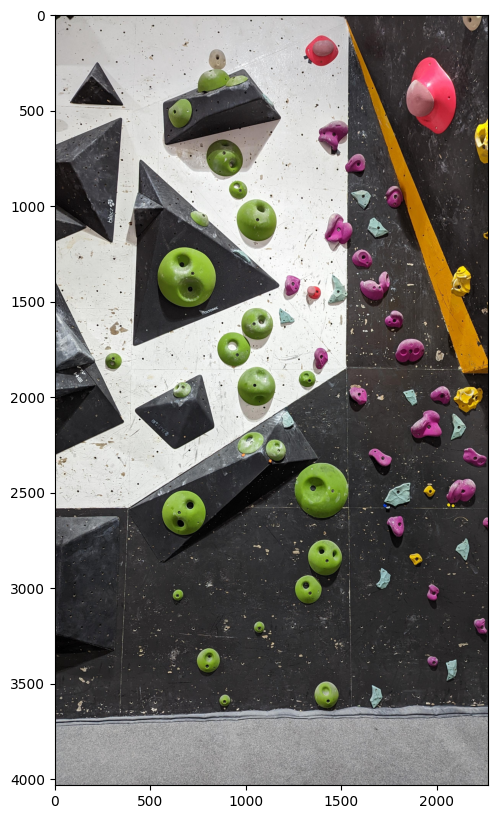

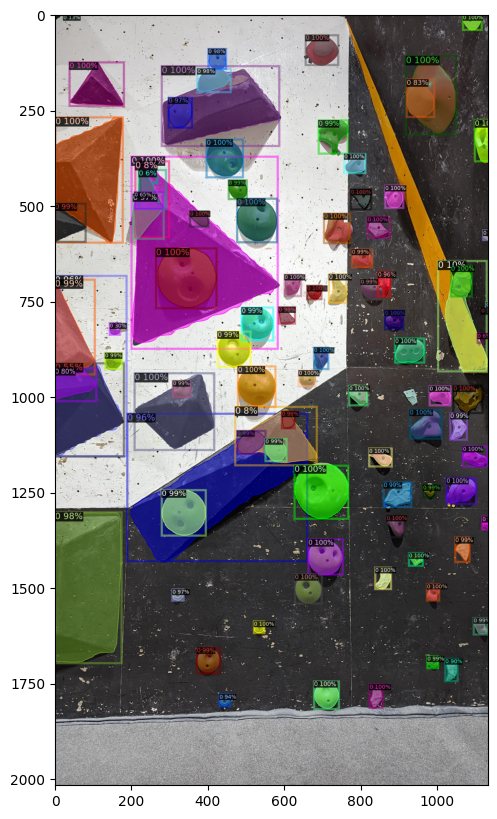

In [17]:
image_file = coco_test_labels["images"][14]["file_name"]
im = cv2.imread(local_config["PATH"]["coco_routes"]+image_file)
plt.figure(figsize = (15,10))
plt.imshow(im[:,:,::-1])
plt.show()
on_image(
    local_config["PATH"]["coco_routes"]+image_file,
    predictor,
    image_size = (15,10))